# Gradient boosting and Random Forest
## Based on data from https://www.kaggle.com/c/bioresponse

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import log_loss

In [2]:
%%capture 
%run nihil_ml_utils.ipynb

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
def sigmoid(z):
    return 1. / (1. + np.exp(-z))

In [5]:
# data download: set describes biological response for different molecules
# 1-st column says was or not response, others columns (d1 - d1776) describes
# different characteristics of molecules such as shape, size, etc.
gbm_df = pd.read_csv(to_path('gbm-data.csv'))

In [7]:
# Data decomposition
X = gbm_df.iloc[:, 1:]
y = gbm_df.iloc[:, 0]
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.8,
                                                    random_state=241)

In [8]:
# For each learn_rate coef do:
#   fit classifier to train data
#   get decision function for each iteration of GB
#   use it to calc quality on train and test populations and transform by 
#   sigmoid
#   pict log-loss

In [9]:
def get_log_loss(clf_instance, X, y):
    """calls method <staged_decision_function(X)>, then iterates over returned
    generator. On every iteration generator returns array of applied decision
    function to X (i.e. in array contains result for each sample) and for each
    element of that array applies sigmoid. After that calculate log_loss on y
    and transformed decision function response to get a scalar. Result is array
    of scalars, one scalar for iteration of tree construction (single generator
    return)
    """
    # staged_decision_function - returns generator, each element of generator
    # is array with shape(num_samples). We use sigmoid to transform response
    # from decision function to [0; 1] probability.
    dec_f_gen = clf_instance.staged_decision_function(X)
    return [log_loss(y, sigmoid(sample_vec))
            for sample_vec in dec_f_gen]

Current learning rate: 1.0
      Iter       Train Loss   Remaining Time 
         1           1.0190            8.96s
         2           0.9192            8.68s
         3           0.8272            7.58s
         4           0.7834            6.70s
         5           0.7109            6.52s
         6           0.6368            6.75s
         7           0.5797            6.80s
         8           0.5610            6.38s
         9           0.5185            6.27s
        10           0.4984            6.00s
        20           0.1999            5.68s
        30           0.1313            5.02s
        40           0.0790            4.76s
        50           0.0511            4.49s
        60           0.0352            4.30s
        70           0.0245            4.02s
        80           0.0162            3.80s
        90           0.0114            3.55s
       100           0.0077            3.33s
       200           0.0004            0.98s
Train log-loss min val: 0.0

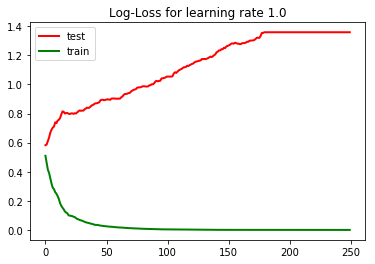

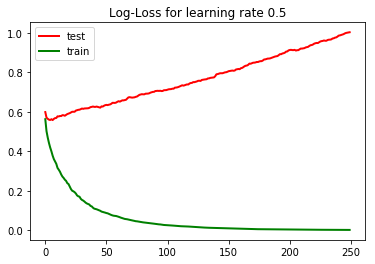

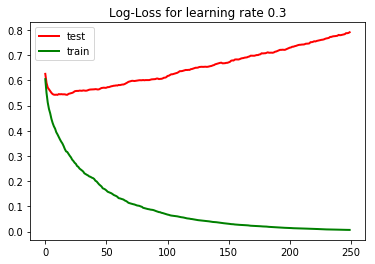

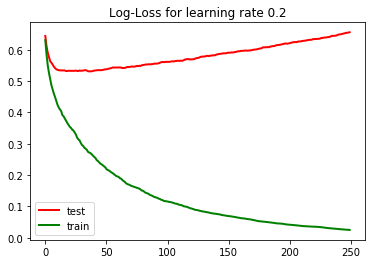

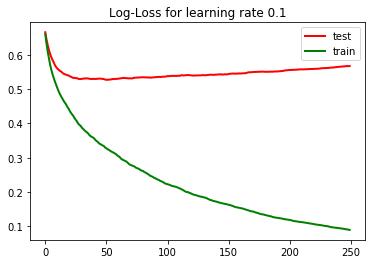

In [10]:
# hard work loop
for cur_rate in [1.0, 0.5, 0.3, 0.2, 0.1]:
    print(f'Current learning rate: {cur_rate}')
    gb_clf = GradientBoostingClassifier(n_estimators=250,
                                        verbose=True,
                                        random_state=241,
                                        learning_rate=cur_rate)
    # train classifier
    gb_clf.fit(X_train, y_train)
    # calc log-loss
    train_loss = get_log_loss(gb_clf, X_train, y_train)
    test_loss = get_log_loss(gb_clf, X_test, y_test)
    # plot some results
    plt.figure()
    plt.plot(test_loss, 'r', linewidth=2)
    plt.plot(train_loss, 'g', linewidth=2)
    plt.legend(['test', 'train'])
    plt.title(f'Log-Loss for learning rate {cur_rate}')
    # minimum of log-loss measure
    print(f'Train log-loss min val: {np.min(train_loss):.2f}, '
          f'iteration: {np.argmin(train_loss):.2f}')
    print(f'Test log-loss min val: {np.min(test_loss):.2f}, '
          f'iteration: {np.argmin(test_loss):.2f}')

In [11]:
# Random forest comes to play
rand_forest_clf = RandomForestClassifier(n_estimators=37, random_state=241)
rand_forest_clf.fit(X_train, y_train)
# predict_proba - returns probabilities, not decisions
forest_res = log_loss(y_test, rand_forest_clf.predict_proba(X_test))
print(f'Random forest result: {forest_res:.2f}')

Random forest result: 0.54
